### Problem Statement:
* Welcome to Inceptez hackathon – Credit Risk in Fintech Industry.
* You are required to build and train a model that identifies Fully Paid and Charged-off loans from the loan dataset.
* This dataset is included in loan data, and provides a challenging classifier that will test what you have learnt in this course.



In [4]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings("ignore")

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KDTree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [5]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
data=pd.read_csv("https://raw.githubusercontent.com/Manichellappan/datascience-batch-21/main/Inceptez_hackathon/train_loan_data.csv")

In [7]:
data_test=pd.read_csv("https://raw.githubusercontent.com/Manichellappan/datascience-batch-21/main/Inceptez_hackathon/test_loan_data.csv")

In [8]:
target_data=pd.read_csv("https://raw.githubusercontent.com/Manichellappan/datascience-batch-21/main/Inceptez_hackathon/test_results.csv")

In [9]:
data_copy=pd.read_csv("https://raw.githubusercontent.com/Manichellappan/datascience-batch-21/main/Inceptez_hackathon/train_loan_data.csv")

In [10]:
data.shape,data_test.shape

((80000, 28), (20000, 27))

In [11]:
data_test

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified


In [12]:
data.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid


In [13]:
data.duplicated().sum()

0

In [14]:
data.isna().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [15]:
data.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [17]:
data['loan_status'].value_counts()

Fully Paid     64030
Charged Off    15970
Name: loan_status, dtype: int64

In [18]:
fully_paid_percentage=(sum(data['loan_status']=='Fully Paid')/len(data['loan_status']))*100

In [19]:
print(" Percentage of records in data that pertains to Fully Paid is ",fully_paid_percentage,"%")

 Percentage of records in data that pertains to Fully Paid is  80.0375 %


In [20]:
charged_off_percentage=(sum(data['loan_status']=='Charged Off')/len(data['loan_status']))*100

In [21]:
print(" Percentage of records in data that pertains to Fully Paid is ",charged_off_percentage,"%")

 Percentage of records in data that pertains to Fully Paid is  19.9625 %


In [22]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [23]:
cat=data.select_dtypes(exclude=np.number)

In [24]:
for i in cat.columns:
    print(i)
    print(data[i].unique())
    print('************************************************************************************')

addr_state
['CO' 'CA' 'FL' 'IL' 'MD' 'NY' 'PA' 'WI' 'UT' 'TX' 'AL' 'KS' 'AR' 'AZ'
 'MI' 'MN' 'LA' 'HI' 'NC' 'VT' 'OK' 'KY' 'ME' 'CT' 'AK' 'NJ' 'IN' 'GA'
 'MA' 'OR' 'NM' 'VA' 'TN' 'SC' 'NV' 'WY' 'WA' 'WV' 'MO' 'OH' 'MS' 'DC'
 'NE' 'ID' 'NH' 'RI' 'SD' 'MT' 'DE' 'ND' 'IA']
************************************************************************************
earliest_cr_line
['Jul-1997' 'Apr-1987' 'Aug-2007' 'Sep-1980' 'Jul-1999' 'May-1991'
 'Oct-1986' 'Nov-1995' 'Dec-2007' 'Jun-2004' 'Aug-1996' 'Oct-1998'
 'May-2007' 'Oct-2000' 'Jan-2005' 'Apr-2004' 'Sep-2000' 'Sep-1993'
 'Oct-2001' 'May-2001' 'Jun-2006' 'Jan-1998' 'Jan-1999' 'Jul-1998'
 'Jun-2003' 'Jul-2009' 'Nov-2006' 'Feb-2006' 'Aug-2010' 'Apr-2001'
 'Dec-2002' 'Jun-1978' 'Oct-2004' 'Feb-2004' 'Sep-2006' 'May-1999'
 'Jan-1988' 'Mar-1992' 'Jun-2011' 'Jul-2001' 'Feb-1995' 'Dec-2005'
 'Nov-1997' 'Sep-2003' 'Feb-1991' 'Dec-2000' 'May-2003' 'Jul-2003'
 'Nov-1990' 'Oct-1996' 'Nov-2003' 'Nov-1993' 'Jun-2000' 'Jun-1987'
 'Jun-2005' 'Aug-1987' '

['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'small_business' 'medical' 'major_purchase' 'car' 'vacation' 'house'
 'moving' 'wedding' 'renewable_energy' 'educational']
************************************************************************************
sub_grade
['E1' 'B1' 'B5' 'B2' 'F5' 'D3' 'C1' 'C4' 'B4' 'D4' 'A5' 'C3' 'C2' 'E4'
 'F3' 'E2' 'A1' 'C5' 'B3' 'E5' 'A4' 'D2' 'F2' 'A2' 'A3' 'F1' 'D5' 'D1'
 'E3' 'G2' 'F4' 'G1' 'G3' 'G4' 'G5']
************************************************************************************
term
[' 60 months' ' 36 months']
************************************************************************************
title
['Debt consolidation' 'Credit Loan' 'Debt Connsolidation' ...
 'cr card payoff' 'Debt in one place' 'Consolidate 2012']
************************************************************************************
verification_status
['Source Verified' 'Verified' 'Not Verified']
***********************************************************

In [25]:
# creating a custom transformer to slice term feature to remove months from the string and
# convert the feature 'earliest_cr_line' from the format Mar-2014 to total year (difference between the current date and Mar-2014)

In [26]:

class TermAndCreditLineTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        # for slicing term column
        X_copy['term']=X_copy['term'].apply(lambda x: x[:3])
        X_copy['term']=X_copy['term'].astype(int)
        #for converting av to total no of year from mention year untilnow.
        # Check data format and handle missing values
        if 'earliest_cr_line' in X_copy.columns:
            X_copy['earliest_cr_line'] = pd.to_datetime(X_copy['earliest_cr_line'], format='%b-%Y', errors='coerce')
                 # Handle missing values here if needed
            if X_copy['earliest_cr_line'].isnull().any():
                pass

            current_date = pd.to_datetime(datetime.now())

            # Calculate the total years since the earliest credit line
            X_copy['earliest_cr_line'] = ((current_date - X_copy['earliest_cr_line']).dt.total_seconds() / (365.25 * 24 * 3600))
            #X_copy['earliest_cr_line'] = X_copy['earliest_cr_line'].astype(float)

        return X_copy


In [27]:
# to check if my custom tranformer is working
p=Pipeline(steps=[
    ("x",TermAndCreditLineTransformer())
])

In [28]:
p

Pipeline(steps=[('x', TermAndCreditLineTransformer())])

In [29]:
# to check if my transformer is working
c=ColumnTransformer(transformers=[
    ("s",p,['earliest_cr_line','term'])
])

In [30]:
# our tranformer is working fine.
c.fit_transform(data)

array([[26.30945798, 60.        ],
       [36.55997132, 36.        ],
       [16.22595353, 36.        ],
       ...,
       [18.5586024 , 36.        ],
       [31.55791794, 60.        ],
       [24.39296243, 36.        ]])

## Exploratory Data Analysis and Preprocessing the data.

* lets first start treating our null values one by one in the order of columns with the most null values and progress on to next ones in the same order.
* before that , let's look at the outliers first.

In [31]:
# To look at the outliers:

for i in data.select_dtypes(include=np.number).columns:
    print(i)
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
    print('lower_bound of ',i,' is ', lower_bound)
    print('upper_bound of ',i,' is ', upper_bound)
    print('Outliers on Feature ',i, 'is',outliers.shape[0])
    print("***********************************************")
    

annual_inc
lower_bound of  annual_inc  is  -20000.0
upper_bound of  annual_inc  is  156000.0
Outliers on Feature  annual_inc is 3896
***********************************************
fico_range_high
lower_bound of  fico_range_high  is  614.0
upper_bound of  fico_range_high  is  774.0
Outliers on Feature  fico_range_high is 2692
***********************************************
fico_range_low
lower_bound of  fico_range_low  is  610.0
upper_bound of  fico_range_low  is  770.0
Outliers on Feature  fico_range_low is 2692
***********************************************
int_rate
lower_bound of  int_rate  is  0.39000000000000057
upper_bound of  int_rate  is  25.35
Outliers on Feature  int_rate is 1497
***********************************************
loan_amnt
lower_bound of  loan_amnt  is  -10187.5
upper_bound of  loan_amnt  is  38112.5
Outliers on Feature  loan_amnt is 431
***********************************************
num_actv_bc_tl
lower_bound of  num_actv_bc_tl  is  -2.5
upper_bound of  num_a

 #### It seems like all the numerical features are having outliers. we will look at all the columns one by one treat those outliers if we have anything.

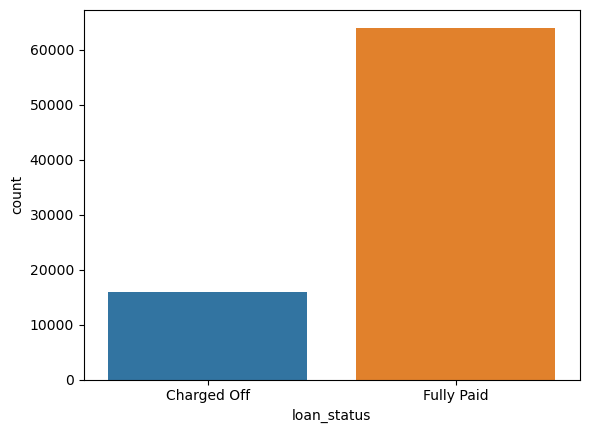

In [32]:
# let's look at the no of records whose status is Charged off and the number of records with Fully paid.
sns.countplot(data=data, x='loan_status');

In [33]:
fully_paid_percentage=(sum(data['loan_status']=='Fully Paid')/len(data['loan_status']))*100

In [34]:
print(" Percentage of records in data that pertains to Fully Paid is ",fully_paid_percentage,"%")

 Percentage of records in data that pertains to Fully Paid is  80.0375 %


In [35]:
charged_off_percentage=(sum(data['loan_status']=='Charged Off')/len(data['loan_status']))*100

In [36]:
print(" Percentage of records in data that pertains to Fully Paid is ",charged_off_percentage,"%")

 Percentage of records in data that pertains to Fully Paid is  19.9625 %


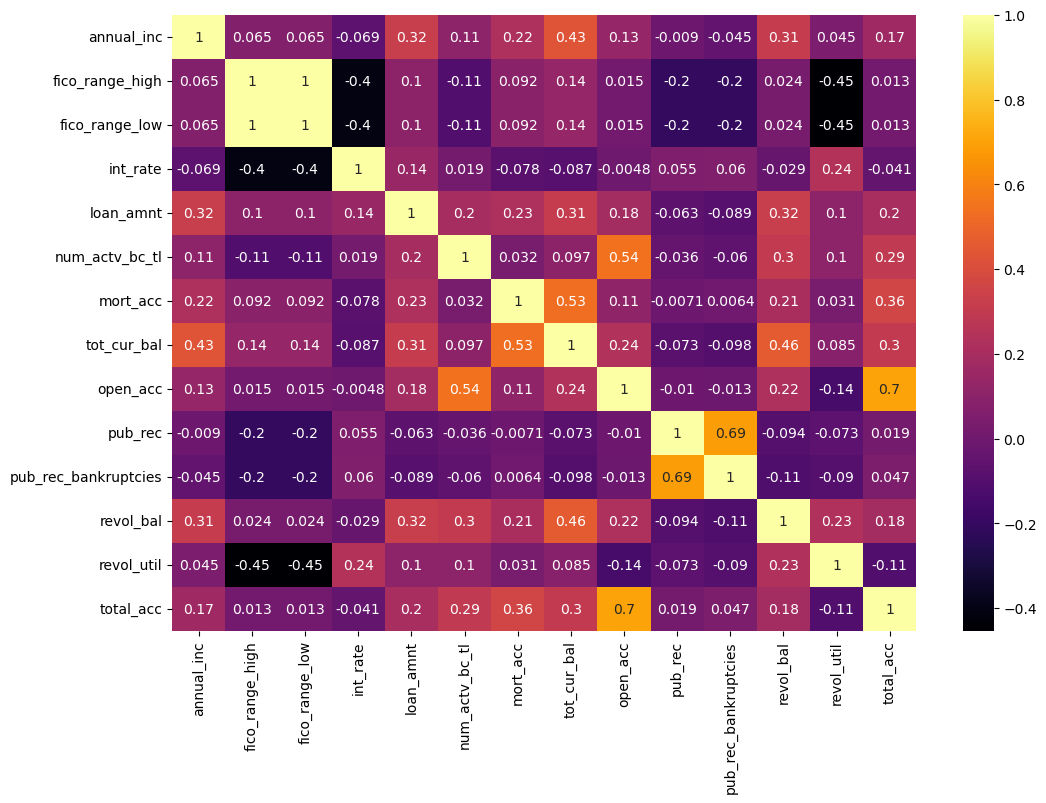

In [37]:
# let's look at the relationship each variable using the pearso's correlation co-efficeint and heatmap fucntion from seaborn.
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='inferno', annot=True);

In [38]:
# as we can see, features "fico_range_high" and "fico_range_low" are having correlation between them as a perfect 1. 
# we can drop one and we can look at corelation again.
# Likewise, "pub_rec" and "pub_rec_bankruptcies" have same corelation with "fico_range_high" .
# total_account and open_acc are highly correlated, we will further explore those features in detail.
# revol_util is having the lowest correlation of all followed by int_rate and that is also with "fico_range_high" and "fico_range_low"

In [39]:
data.drop(columns=['fico_range_low'],inplace=True)

<Axes: >

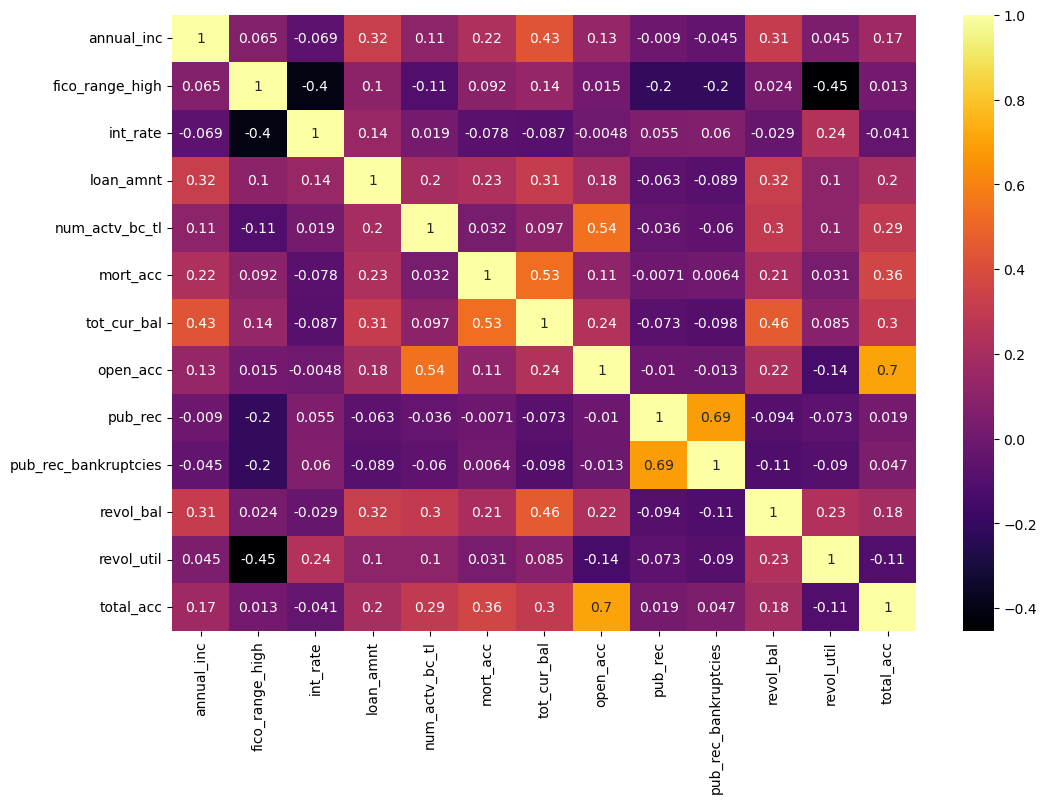

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='inferno', annot=True)

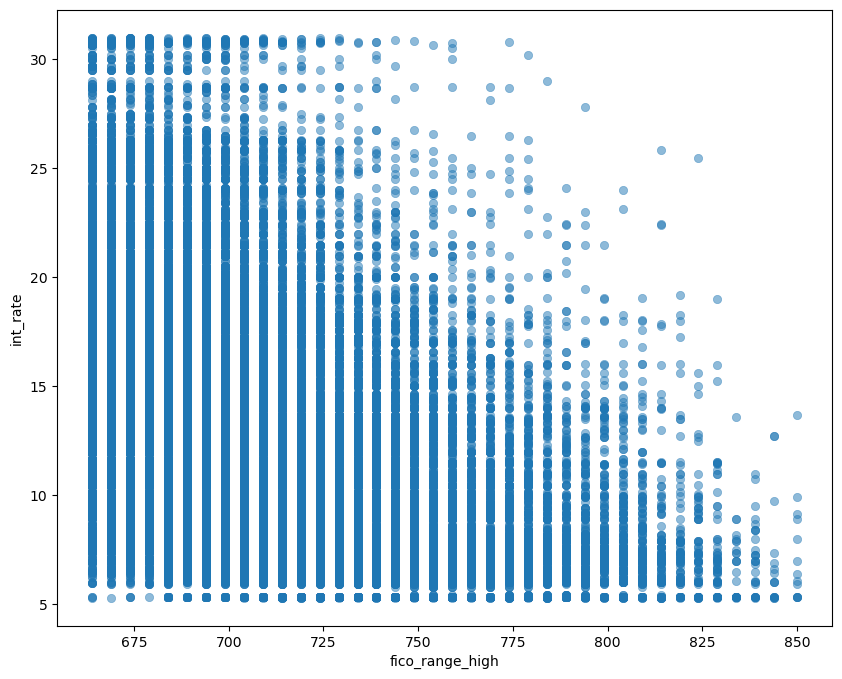

In [41]:
# scatter plot for "fico_range_high" vs "int_rate"
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='fico_range_high', y='int_rate', edgecolor=None, alpha=0.5);

* eventhought with "fico_range_high" with the range of (675-725) does not give any insight, we can clearly see that the interest rate started droping when "fico_range_high" increases.

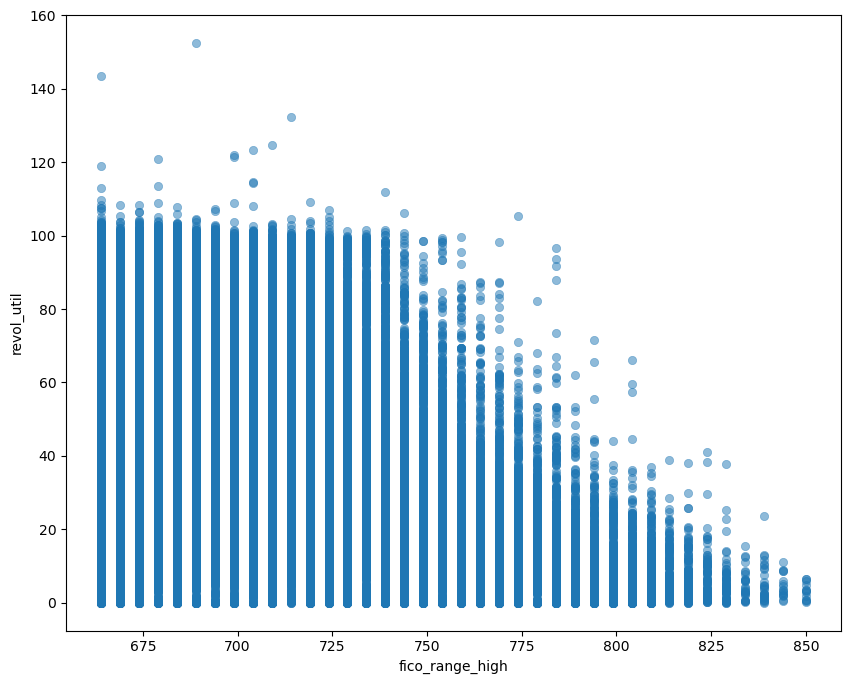

In [42]:
# scatter plot for "fico_range_high" vs "revol_util"
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='fico_range_high', y='revol_util', edgecolor=None, alpha=0.5);

* same as "int_rate" we can see that "revol_util" started droping after a "fico_range_hign" score of 745.

In [43]:
# Now lets look at "pub_rec" and "pub_rec_bankruptcies" features
data['pub_rec'].value_counts,data['pub_rec_bankruptcies'].value_counts

(<bound method IndexOpsMixin.value_counts of 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 79995    0.0
 79996    0.0
 79997    0.0
 79998    1.0
 79999    0.0
 Name: pub_rec, Length: 80000, dtype: float64>,
 <bound method IndexOpsMixin.value_counts of 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
         ... 
 79995    0.0
 79996    0.0
 79997    0.0
 79998    1.0
 79999    0.0
 Name: pub_rec_bankruptcies, Length: 80000, dtype: float64>)

In [44]:
# As we can see, they both represent the same entries, so , let's drop one of them.

In [45]:
data.drop(columns=["pub_rec_bankruptcies"],inplace=True)

In [46]:
data.isna().sum()

addr_state                0
annual_inc                0
earliest_cr_line          0
emp_length             4588
emp_title              5018
fico_range_high           0
grade                     0
home_ownership            0
application_type          0
initial_list_status       0
int_rate                  0
loan_amnt                 0
num_actv_bc_tl         3948
mort_acc               2771
tot_cur_bal            3948
open_acc                  0
pub_rec                   0
purpose                   0
revol_bal                 0
revol_util               53
sub_grade                 0
term                      0
title                   970
total_acc                 0
verification_status       0
loan_status               0
dtype: int64

In [47]:
# features grade and subgrade seems like they are representing slmost the same.
# lets look at it now

In [48]:
sorted_grade=sorted(data['grade'].unique())

In [49]:
sorted_subgrade=sorted(data['sub_grade'].unique())

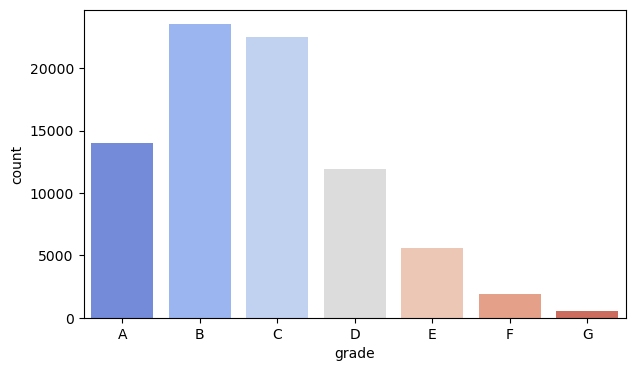

In [50]:
#count plot for grade.
plt.figure(figsize=(7,4))
sns.countplot(data=data, x='grade',order=sorted_grade, palette='coolwarm');

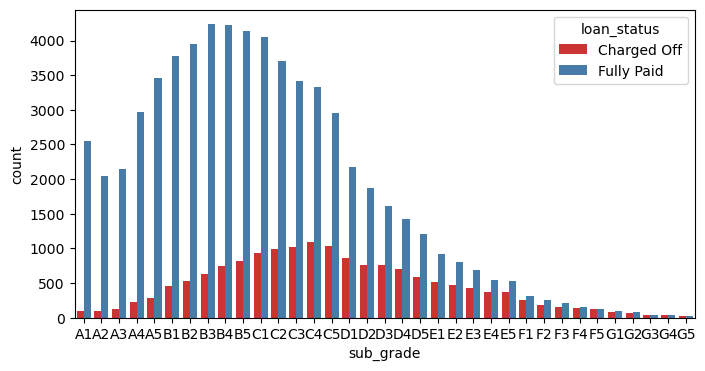

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='sub_grade',order=sorted_subgrade,hue='loan_status', palette='Set1');

In [52]:
#if we compare scatter plots for grade and sub_grade, they follow the same pattern. 
# since sub_grade catches more patterns than grade, we can keep the sub_grade column and drop the grade column.
# you can clearly see that majority of customers with sub_grade F,G did not pay their loans.

In [53]:
data.drop(columns=['grade'],inplace=True)

In [54]:
data['loan_status']=data['loan_status'].str.replace("Fully Paid","1").str.replace("Charged Off","0")
data['loan_status']=data['loan_status'].astype(int)

<Axes: >

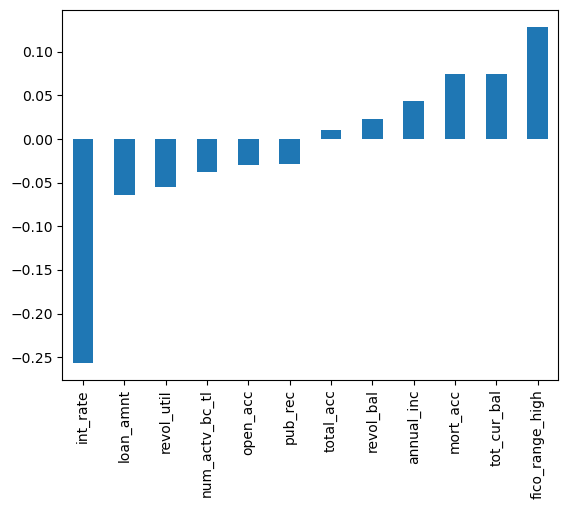

In [55]:
data.corr()['loan_status'].sort_values()[:-1].plot(kind='bar')

## Missing Value treatments:

In [56]:
# lets treat the missing values on data['emp_length']

In [57]:
data['emp_length'].value_counts()

10+ years    26278
2 years       7319
3 years       6474
< 1 year      6297
1 year        5294
5 years       5094
4 years       4763
6 years       3691
7 years       3597
8 years       3583
9 years       3022
Name: emp_length, dtype: int64

In [58]:
# for sorted function to work, you need to give dropna() to drop the null values and sort them.
sorted(data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [59]:
#store this in a variable in proper order.
sorted_exp=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

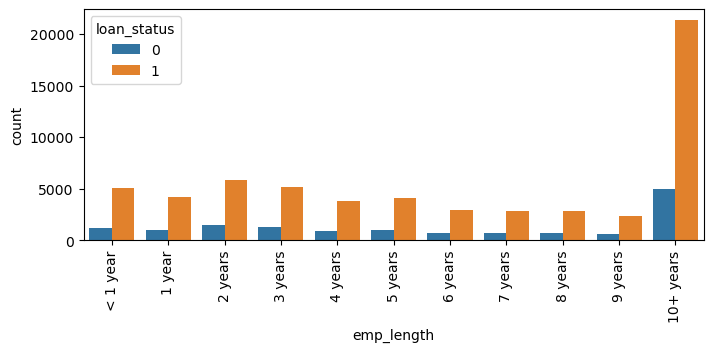

In [60]:
# Let's created a count plot with the sorted_exp
plt.figure(figsize=(8,3))
sns.countplot(data=data,x="emp_length",order=sorted_exp,hue='loan_status')
plt.xticks(rotation=90)
plt.show()

In [61]:
#we are still not able to come up with a defenite relationship between "emp_length" and "loan_status" from the above graph.
# we still need to find the proortion of beople who paid and not paid

In [62]:
data[data['loan_status']==1].groupby('emp_length')['loan_status'].count()

emp_length
1 year        4244
10+ years    21315
2 years       5852
3 years       5212
4 years       3815
5 years       4095
6 years       2969
7 years       2849
8 years       2868
9 years       2416
< 1 year      5046
Name: loan_status, dtype: int64

In [63]:
paid=data[data['loan_status']==1].groupby('emp_length')['loan_status'].count()

In [64]:
not_paid=data[data['loan_status']==0].groupby('emp_length')['loan_status'].count()

In [65]:
ratio=paid/not_paid

In [66]:
ratio

emp_length
1 year       4.041905
10+ years    4.294781
2 years      3.989093
3 years      4.129952
4 years      4.024262
5 years      4.099099
6 years      4.112188
7 years      3.808824
8 years      4.011189
9 years      3.986799
< 1 year     4.033573
Name: loan_status, dtype: float64

In [67]:
# if we look at the ration between customers who has paid and who has not paid in "emp_length" feature, its all the same.
# so we can delete that column because its not showing any importance for predicting "loan_status"

In [68]:
data.drop(columns=['emp_length'],inplace=True)

In [69]:
data['emp_title'].nunique()

36661

In [70]:
# there are about 36661 unique values in data['emp_title'] and its a lot of data to get Onehotencodeing.
# we can get a relationship of title with "loan_status" from "annul_inc" feature
# the amount of money a customer gets paid annually will defenitely have a relationship with the customers profession
# so let's delete the "emp_title" column

In [71]:
data.drop(columns=['emp_title'],inplace=True)

In [72]:
data.isna().sum()

addr_state                0
annual_inc                0
earliest_cr_line          0
fico_range_high           0
home_ownership            0
application_type          0
initial_list_status       0
int_rate                  0
loan_amnt                 0
num_actv_bc_tl         3948
mort_acc               2771
tot_cur_bal            3948
open_acc                  0
pub_rec                   0
purpose                   0
revol_bal                 0
revol_util               53
sub_grade                 0
term                      0
title                   970
total_acc                 0
verification_status       0
loan_status               0
dtype: int64

In [73]:
data['num_actv_bc_tl'].value_counts()

3.0     16176
2.0     15722
4.0     12483
1.0      8824
5.0      8426
6.0      5246
7.0      3032
8.0      1762
0.0      1662
9.0      1085
10.0      665
11.0      386
12.0      219
13.0      143
14.0       77
15.0       46
16.0       31
17.0       24
18.0       14
19.0        9
21.0        6
22.0        4
20.0        3
26.0        3
25.0        1
24.0        1
27.0        1
32.0        1
Name: num_actv_bc_tl, dtype: int64

In [74]:
data.groupby('num_actv_bc_tl')['loan_status'].value_counts()

num_actv_bc_tl  loan_status
0.0             1               1290
                0                372
1.0             1               7180
                0               1644
2.0             1              12768
                0               2954
3.0             1              13060
                0               3116
4.0             1               9923
                0               2560
5.0             1               6611
                0               1815
6.0             1               4134
                0               1112
7.0             1               2332
                0                700
8.0             1               1348
                0                414
9.0             1                809
                0                276
10.0            1                515
                0                150
11.0            1                283
                0                103
12.0            1                161
                0                 58
13.0      

In [75]:
data[data['num_actv_bc_tl']>20.0]

,addr_state,annual_inc,earliest_cr_line,fico_range_high,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,...,pub_rec,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
2445,NY,200000.0,Mar-1980,714.0,MORTGAGE,Individual,w,6.89,8000.0,25.0,...,0.0,debt_consolidation,57436.0,32.7,A3,36 months,Debt consolidation,86.0,Verified,1
17612,FL,125000.0,Dec-1995,719.0,MORTGAGE,Individual,w,15.59,40000.0,24.0,...,0.0,debt_consolidation,53327.0,56.7,C5,36 months,Debt consolidation,47.0,Verified,1
17988,LA,300000.0,Aug-1981,684.0,MORTGAGE,Individual,f,7.89,25000.0,21.0,...,0.0,credit_card,136055.0,50.8,A5,36 months,Credit card refinancing,56.0,Verified,1
23339,TX,80000.0,Sep-1991,684.0,MORTGAGE,Individual,w,6.24,12000.0,22.0,...,0.0,debt_consolidation,38495.0,26.3,A2,36 months,Debt consolidation,69.0,Source Verified,1
25214,NJ,94300.0,Jun-1995,674.0,RENT,Individual,w,19.52,35000.0,26.0,...,0.0,debt_consolidation,42459.0,47.9,D4,36 months,cleanslatebill,48.0,Verified,0
31303,FL,90000.0,Sep-1989,679.0,MORTGAGE,Individual,w,7.89,25000.0,26.0,...,0.0,credit_card,40143.0,57.9,A5,36 months,Credit card refinancing,55.0,Source Verified,1
35190,IN,85000.0,May-1999,729.0,OWN,Individual,f,6.89,5000.0,21.0,...,0.0,debt_consolidation,31079.0,21.4,A3,36 months,Debt consolidation,65.0,Not Verified,0
52532,NH,90000.0,Dec-1979,764.0,OWN,Individual,w,5.32,20000.0,21.0,...,0.0,debt_consolidation,26652.0,9.8,A1,36 months,NaN,46.0,Source Verified,1
54171,IL,149000.0,Dec-1996,694.0,MORTGAGE,Individual,w,14.99,28000.0,26.0,...,0.0,debt_consolidation,58952.0,60.2,C5,36 months,Debt consolidation,62.0,Source Verified,1
57827,CT,100000.0,May-2001,719.0,MORTGAGE,Individual,f,16.29,30000.0,22.0,...,0.0,debt_consolidation,56689.0,50.2,D2,60 months,Debt consolidation,63.0,Verified,0


In [76]:
#lets find the ratio like before.

In [77]:
sorted(data['num_actv_bc_tl'].dropna().unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 24.0,
 25.0,
 26.0,
 27.0,
 32.0]

In [78]:
num_actv_bc_tl_sorted=sorted(data['num_actv_bc_tl'].dropna().unique())

In [79]:
paid_=data[data['loan_status']==1].groupby('num_actv_bc_tl')['loan_status'].count()

In [80]:
notpaid_=data[data['loan_status']==0].groupby('num_actv_bc_tl')['loan_status'].count()

In [81]:
paid_

num_actv_bc_tl
0.0      1290
1.0      7180
2.0     12768
3.0     13060
4.0      9923
5.0      6611
6.0      4134
7.0      2332
8.0      1348
9.0       809
10.0      515
11.0      283
12.0      161
13.0      100
14.0       59
15.0       30
16.0       25
17.0       18
18.0       10
19.0        6
20.0        1
21.0        4
22.0        2
24.0        1
25.0        1
26.0        2
32.0        1
Name: loan_status, dtype: int64

In [82]:
ratio_=paid_/notpaid_

In [83]:
ratio_

num_actv_bc_tl
0.0     3.467742
1.0     4.367397
2.0     4.322275
3.0     4.191271
4.0     3.876172
5.0     3.642424
6.0     3.717626
7.0     3.331429
8.0     3.256039
9.0     2.931159
10.0    3.433333
11.0    2.747573
12.0    2.775862
13.0    2.325581
14.0    3.277778
15.0    1.875000
16.0    4.166667
17.0    3.000000
18.0    2.500000
19.0    2.000000
20.0    0.500000
21.0    2.000000
22.0    1.000000
24.0         NaN
25.0         NaN
26.0    2.000000
27.0         NaN
32.0         NaN
Name: loan_status, dtype: float64

In [84]:
data.corr()['num_actv_bc_tl']

annual_inc         0.106228
fico_range_high   -0.108283
int_rate           0.019435
loan_amnt          0.197615
num_actv_bc_tl     1.000000
mort_acc           0.031868
tot_cur_bal        0.097332
open_acc           0.544174
pub_rec           -0.035742
revol_bal          0.299474
revol_util         0.103162
total_acc          0.292003
loan_status       -0.037456
Name: num_actv_bc_tl, dtype: float64

In [85]:
# num_actv_bc_tl feature has the max relationship with open_acc
#so lets try and impute by grouping num_actv_bc_tl with open_acc

<Axes: xlabel='open_acc', ylabel='num_actv_bc_tl'>

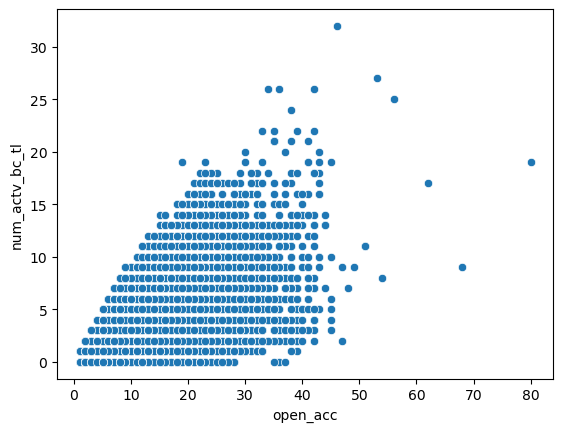

In [86]:
sns.scatterplot(data=data,x='open_acc',y='num_actv_bc_tl')

In [87]:
# we can clearly see a pattern here but thats not enough to conclude that num_actv_bc_tl increases with open_acc.
# since this is our highly corelated column with num_actv_bc_tl, we will try and impute with this column itself.

In [88]:
data.groupby('open_acc')['num_actv_bc_tl'].mean()

open_acc
1.0      0.782609
2.0      1.146245
3.0      1.436364
4.0      1.756121
5.0      2.055249
6.0      2.270372
7.0      2.555166
8.0      2.765783
9.0      3.064269
10.0     3.291969
11.0     3.522701
12.0     3.807769
13.0     3.997915
14.0     4.235713
15.0     4.444315
16.0     4.726166
17.0     4.802065
18.0     5.123138
19.0     5.204700
20.0     5.584375
21.0     5.635735
22.0     5.902222
23.0     6.202514
24.0     6.134513
25.0     6.342723
26.0     6.351124
27.0     6.842466
28.0     6.716495
29.0     7.377143
30.0     7.343949
31.0     7.200000
32.0     7.736842
33.0     7.974359
34.0     7.960000
35.0     9.276596
36.0     8.714286
37.0     8.500000
38.0     9.250000
39.0     7.916667
40.0     8.615385
41.0    10.500000
42.0    10.100000
43.0    14.000000
44.0    11.750000
45.0     7.833333
46.0    32.000000
47.0     5.500000
48.0     7.000000
49.0     9.000000
51.0    11.000000
53.0    27.000000
54.0     8.000000
56.0    25.000000
62.0    17.000000
68.0     9.000000
8

In [89]:
data['num_actv_bc_tl'].fillna(data.groupby('open_acc')['num_actv_bc_tl'].transform('mean'))

0         1.0
1         4.0
2         4.0
3         4.0
4        14.0
         ... 
79995     5.0
79996     2.0
79997     1.0
79998     3.0
79999     4.0
Name: num_actv_bc_tl, Length: 80000, dtype: float64

In [90]:
data['num_actv_bc_tl']=data.groupby('open_acc')['num_actv_bc_tl'].transform(lambda x: x.fillna(x.mean()))

In [91]:
data['num_actv_bc_tl'].isna().sum()

0

In [92]:
# custom transformer for to groupby.tranform the mean on "num_actv_bc_tl" feature from total_acc column.
class num_actv_bc_tl(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['num_actv_bc_tl']=X_copy.groupby('total_acc')['num_actv_bc_tl'].transform(lambda x: x.fillna(x.mean()))
        return X_copy

In [93]:
# to check if the pipeline is working with cuatom transformer
b=Pipeline(steps=[
    ("a",num_actv_bc_tl())
])

In [94]:
b

Pipeline(steps=[('a', num_actv_bc_tl())])

In [95]:
# to check if my custom transformer is working
c=ColumnTransformer(transformers=[
    ("r",b,['num_actv_bc_tl','open_acc'])
])

In [96]:
data.isna().sum()

addr_state                0
annual_inc                0
earliest_cr_line          0
fico_range_high           0
home_ownership            0
application_type          0
initial_list_status       0
int_rate                  0
loan_amnt                 0
num_actv_bc_tl            0
mort_acc               2771
tot_cur_bal            3948
open_acc                  0
pub_rec                   0
purpose                   0
revol_bal                 0
revol_util               53
sub_grade                 0
term                      0
title                   970
total_acc                 0
verification_status       0
loan_status               0
dtype: int64

In [97]:
# to find the best correlated column with tot_cur_bal.
# from that we can try and impute the missing values with the highly related column.
data.corr()['tot_cur_bal']

annual_inc         0.430759
fico_range_high    0.135284
int_rate          -0.087000
loan_amnt          0.310725
num_actv_bc_tl     0.097332
mort_acc           0.530393
tot_cur_bal        1.000000
open_acc           0.238560
pub_rec           -0.073238
revol_bal          0.456139
revol_util         0.084849
total_acc          0.299713
loan_status        0.074421
Name: tot_cur_bal, dtype: float64

In [98]:
#"tot_cur_bal" is the most correlated column with the "mort_acc" feature.
data.groupby('mort_acc')['tot_cur_bal'].mean()

mort_acc
0.0     4.243642e+04
1.0     1.576172e+05
2.0     1.876268e+05
3.0     2.132756e+05
4.0     2.401978e+05
5.0     2.714036e+05
6.0     2.934318e+05
7.0     3.131190e+05
8.0     3.493004e+05
9.0     3.731472e+05
10.0    4.764766e+05
11.0    4.844889e+05
12.0    4.702483e+05
13.0    4.431882e+05
14.0    5.007947e+05
15.0    5.180258e+05
16.0    4.959131e+05
17.0    4.943300e+04
18.0    8.608860e+05
19.0    7.664330e+05
20.0    7.946245e+05
22.0    4.073920e+05
24.0    2.898090e+05
26.0    8.692105e+05
27.0    1.686638e+06
29.0    6.801610e+05
31.0    1.029890e+05
32.0    1.107260e+05
Name: tot_cur_bal, dtype: float64

In [99]:
data[['mort_acc','tot_cur_bal']]

,mort_acc,tot_cur_bal
0,1.0,319479.0
1,0.0,19944.0
2,2.0,23199.0
3,1.0,72651.0
4,7.0,64631.0
...,...,...
79995,4.0,220521.0
79996,2.0,245781.0
79997,3.0,382274.0
79998,3.0,201841.0


In [100]:
s=data[data['mort_acc']==0]

In [101]:
s['tot_cur_bal'].mean()

42436.418830317336

In [102]:
# creating a custom transformer to impute missing values on "mort acc" feature with "tot_cur_bal" and wise versa.
# using the transform function on a groupby values to acheive the imputation
class tol_cur_bal_mort_acc():
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['mort_acc']=X_copy.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.median()))
        X_copy['tot_cur_bal']=X_copy.groupby('mort_acc')['tot_cur_bal'].transform(lambda x: x.fillna(x.mean()))
          
        return X_copy
    

In [103]:
data.isna().sum()

addr_state                0
annual_inc                0
earliest_cr_line          0
fico_range_high           0
home_ownership            0
application_type          0
initial_list_status       0
int_rate                  0
loan_amnt                 0
num_actv_bc_tl            0
mort_acc               2771
tot_cur_bal            3948
open_acc                  0
pub_rec                   0
purpose                   0
revol_bal                 0
revol_util               53
sub_grade                 0
term                      0
title                   970
total_acc                 0
verification_status       0
loan_status               0
dtype: int64

In [104]:
data['title'].value_counts()

Debt consolidation                  39396
Credit card refinancing             14802
Home improvement                     4542
Other                                4035
Major purchase                       1422
                                    ...  
DebtConsolidate                         1
Card consolidation                      1
Purchase of an ultrasonic welder        1
Consolidation and Land                  1
Consolidate 2012                        1
Name: title, Length: 5349, dtype: int64

In [105]:
data['purpose'].value_counts()

debt_consolidation    46418
credit_card           17506
home_improvement       5268
other                  4683
major_purchase         1746
small_business          950
medical                 902
car                     868
moving                  548
vacation                518
house                   413
wedding                 110
renewable_energy         54
educational              16
Name: purpose, dtype: int64

In [106]:
# data['title'] has about 5000+ unique values so lets delete title columns.
# moreover we get most of the information from the "title" feature by "purpose" feature itself.
data.drop(columns=['title'])

,addr_state,annual_inc,earliest_cr_line,fico_range_high,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,...,open_acc,pub_rec,purpose,revol_bal,revol_util,sub_grade,term,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,744.0,MORTGAGE,Individual,w,18.99,18075.0,1.0,...,7.0,0.0,debt_consolidation,5338.0,93.6,E1,60 months,8.0,Source Verified,0
1,CA,40000.0,Apr-1987,724.0,RENT,Individual,w,10.16,8800.0,4.0,...,5.0,0.0,debt_consolidation,19944.0,60.3,B1,36 months,12.0,Verified,1
2,FL,60000.0,Aug-2007,679.0,MORTGAGE,Individual,w,11.47,18000.0,4.0,...,7.0,0.0,debt_consolidation,23199.0,88.5,B5,36 months,16.0,Source Verified,1
3,IL,100742.0,Sep-1980,664.0,MORTGAGE,Individual,w,9.16,20000.0,4.0,...,12.0,0.0,debt_consolidation,18425.0,69.0,B2,36 months,19.0,Source Verified,1
4,MD,80000.0,Jul-1999,669.0,RENT,Individual,f,23.83,35000.0,14.0,...,23.0,0.0,debt_consolidation,34370.0,90.0,F5,60 months,59.0,Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-2000,664.0,MORTGAGE,Individual,w,25.89,25850.0,5.0,...,12.0,0.0,debt_consolidation,20201.0,93.5,G3,60 months,42.0,Verified,0
79996,NH,45000.0,Aug-1995,684.0,MORTGAGE,Individual,w,12.29,6975.0,2.0,...,7.0,0.0,debt_consolidation,6145.0,56.9,C1,36 months,14.0,Not Verified,1
79997,NY,90000.0,Apr-2005,724.0,OWN,Individual,w,10.99,7000.0,1.0,...,9.0,0.0,debt_consolidation,3910.0,25.6,B4,36 months,26.0,Source Verified,1
79998,TX,94000.0,Apr-1992,669.0,MORTGAGE,Individual,w,19.47,18000.0,3.0,...,16.0,1.0,credit_card,11897.0,49.4,D5,60 months,48.0,Source Verified,1


In [107]:
X=data.drop(columns=['loan_status'])

In [108]:
data_copy

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199.0,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425.0,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,0.0,debt_consolidation,34370.0,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,81000.0,Feb-2000,10+ years,Sports Group Manager,664.0,660.0,G,MORTGAGE,Individual,...,0.0,debt_consolidation,20201.0,93.5,G3,60 months,Debt consolidation,42.0,Verified,Charged Off
79996,NH,45000.0,Aug-1995,10+ years,Web Designer,684.0,680.0,C,MORTGAGE,Individual,...,0.0,debt_consolidation,6145.0,56.9,C1,36 months,Debt consolidation,14.0,Not Verified,Fully Paid
79997,NY,90000.0,Apr-2005,< 1 year,Program Officer,724.0,720.0,B,OWN,Individual,...,0.0,debt_consolidation,3910.0,25.6,B4,36 months,Debt consolidation,26.0,Source Verified,Fully Paid
79998,TX,94000.0,Apr-1992,3 years,Sr. Business Analyst,669.0,665.0,D,MORTGAGE,Individual,...,1.0,credit_card,11897.0,49.4,D5,60 months,Credit card refinancing,48.0,Source Verified,Fully Paid


In [109]:
y=data_copy[["loan_status"]]

In [110]:
#let's replace, charged off with 1 and fully paid with 0 for ease of application and do the same on target _data as well. 
y['loan_status']=y['loan_status'].replace({"Charged Off":1,"Fully Paid":0})

In [111]:
target_data['loan_status']=target_data['loan_status'].replace({"Charged Off":1,"Fully Paid":0})

In [112]:
# calling the randomoversampler becasue we saw that out data is highly imbalanced.
# data like this will study a lot from the classifier that has more no of records and less on other.
# to overcome this, let's over sample data from the less represented classifier.
ros=RandomOverSampler()

In [113]:
X_resampled, y_resampled=ros.fit_resample(X, y)

In [114]:
# i have deleted fico_range_min,grade,pub_rec_bankruptcies,emp_length,emp_title,title

In [115]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'fico_range_high',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term',
       'title', 'total_acc', 'verification_status', 'loan_status'],
      dtype='object')

In [116]:
# source verified and verified looks one the same, so let's change that to one.
data['verification_status'].value_counts()

Source Verified    30855
Verified           24876
Not Verified       24269
Name: verification_status, dtype: int64

In [117]:
data['verification_status']=data['verification_status'].str.replace("Source Verified","Verified")

In [118]:
verifies_sorted=sorted(data['verification_status'].dropna().unique())
paid_verify=data[data['loan_status']==1].groupby('verification_status')['loan_status'].count()
notpaid_verify=data[data['loan_status']==0].groupby('verification_status')['loan_status'].count()
ratio_verify=paid_verify/notpaid_verify

In [119]:
ratio_verify

verification_status
Not Verified    5.853714
Verified        3.483949
Name: loan_status, dtype: float64

In [120]:
# creating a custom transformer for changing "source verified" into " verified".

class verification_status():
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['verification_status']=X_copy["verification_status"].str.replace("Source Verified","Verified") 
        return X_copy
    
    

In [121]:
# lets create separate pipelines for all the custom tranformer function.

In [122]:
custom_term_earliest_cr_line=Pipeline(steps=[
    ("term,cl",TermAndCreditLineTransformer())
])

In [123]:
custum_num_actv_bc_tl=Pipeline(steps=[
    ("num_bc",num_actv_bc_tl())
])

In [124]:
custum_num_actv_bc_tl

Pipeline(steps=[('num_bc', num_actv_bc_tl())])

In [125]:
custom_tol_cur_bal_mort_acc=Pipeline(steps=[
    ("tot_cur_bal,mort",tol_cur_bal_mort_acc())
])

In [126]:
custom_tol_cur_bal_mort_acc

Pipeline(steps=[('tot_cur_bal,mort',
                 <__main__.tol_cur_bal_mort_acc object at 0x00000179862D2C80>)])

In [127]:
custom_verification_status=Pipeline(steps=[
    ("ver_status",verification_status())
])

In [128]:
custom_verification_status

Pipeline(steps=[('ver_status',
                 <__main__.verification_status object at 0x0000017985EE4E20>)])

In [129]:
# lets create a pipeline for numerical data.
# it has to do slicing for term data, filla na's of several columns with our custom transformer
# has to do simple imputation on one column
# and finnaly has to do scaling.

In [130]:
pipeline1=Pipeline(steps=[
    ("term",custom_term_earliest_cr_line),
    ("num_actv",custum_num_actv_bc_tl),
    ("mort_bal",custom_tol_cur_bal_mort_acc),
    ("impute",SimpleImputer(strategy='median')),
    ("scale",StandardScaler())
])

In [131]:
data.isna().sum()

addr_state                0
annual_inc                0
earliest_cr_line          0
fico_range_high           0
home_ownership            0
application_type          0
initial_list_status       0
int_rate                  0
loan_amnt                 0
num_actv_bc_tl            0
mort_acc               2771
tot_cur_bal            3948
open_acc                  0
pub_rec                   0
purpose                   0
revol_bal                 0
revol_util               53
sub_grade                 0
term                      0
title                   970
total_acc                 0
verification_status       0
loan_status               0
dtype: int64

In [132]:
# creating a list of column names that has numbers in them. it will be easy for me to call in the custom tranformer.
number=["annual_inc","total_acc","term","revol_bal","pub_rec","tot_cur_bal","mort_acc","num_actv_bc_tl",
"loan_amnt","int_rate","fico_range_high","earliest_cr_line"]

In [133]:
# doing this just for the purpose of looking at the corr() between columns after filling null values and scaling the data.
t=ColumnTransformer(transformers=[
    ("pipe",pipeline1,number)
])

In [134]:
t1=pd.DataFrame(t.fit_transform(data),columns=number)

<Axes: >

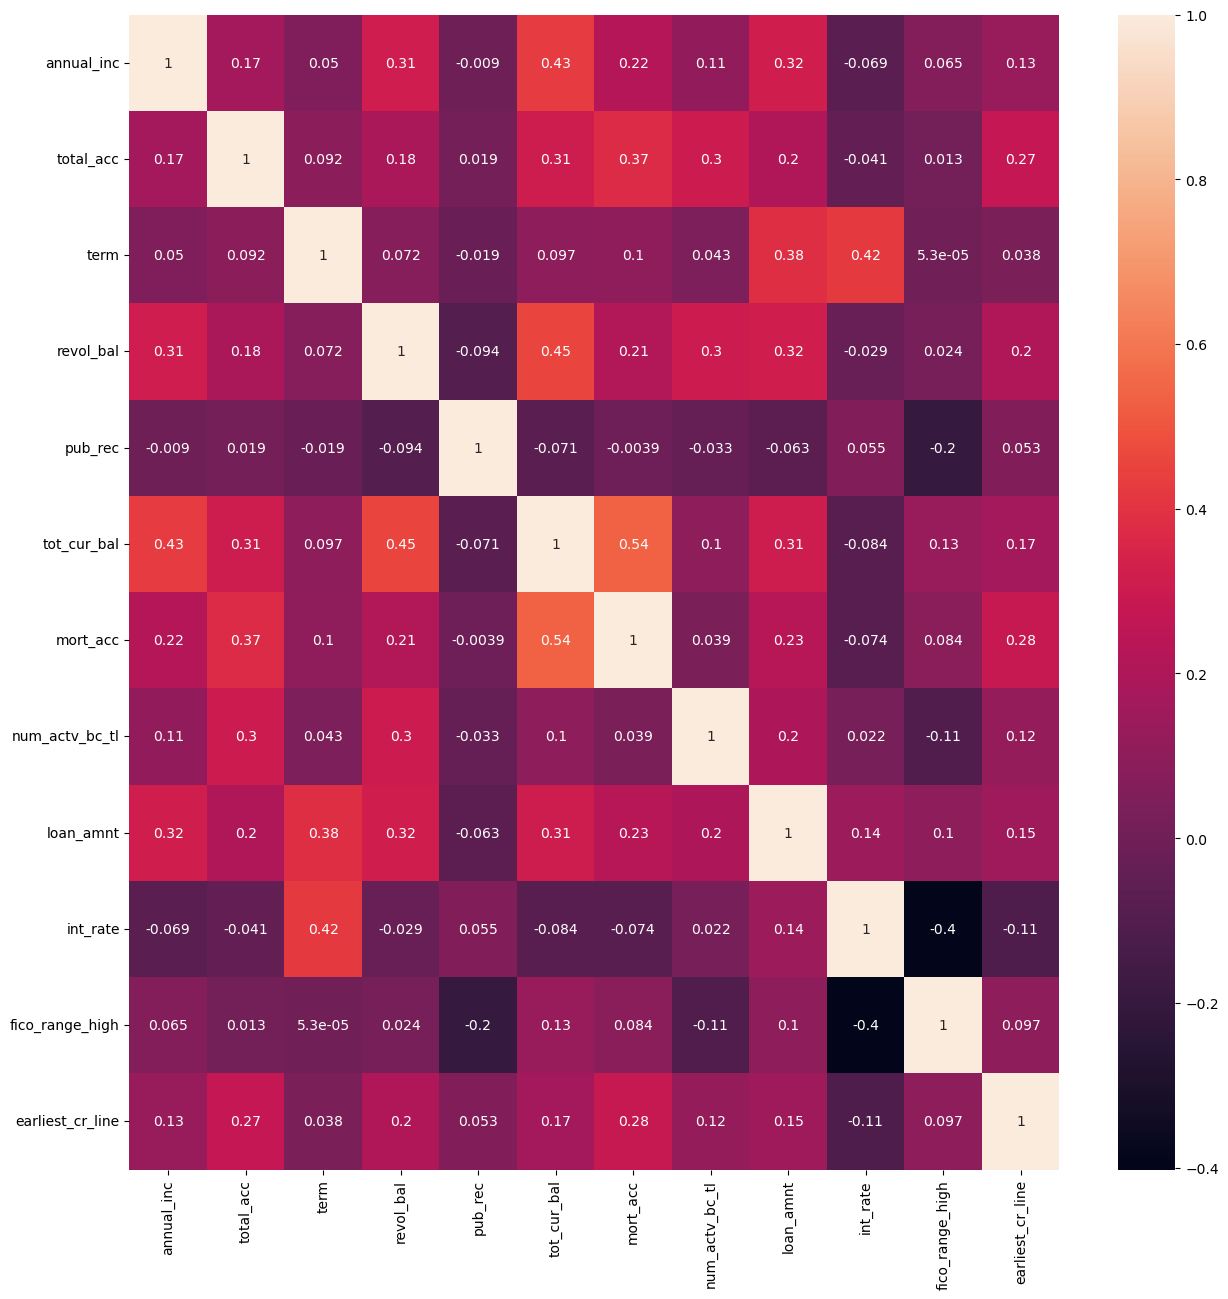

In [135]:
plt.figure(figsize=(15,15))
sns.heatmap(t1.corr(),annot=True)

In [136]:
# creating a list for categorical data
categorical=["home_ownership","application_type","initial_list_status","purpose","sub_grade","verification_status"]

In [137]:
# creating a pipeline for categorical data.
# it has to replace " source verified " values in " verification status " column and replace it with " verified" values .
# using the custom transformer for our task.
# and finally has to do OneHotEncoder.
# droping the first columns from every onehot encoded columns to avaid multicollinearity.

In [138]:

pipeline2=Pipeline(steps=[
    ("ver",custom_verification_status),
    ("ohe",OneHotEncoder(sparse=False,drop='first'))
])

In [139]:
# creating a column transformer to assisn which columns are going into which pipeline.
prepocess=ColumnTransformer(transformers=[
    ("pi",pipeline1,number),
    ("oh",pipeline2,categorical)
])

In [140]:
# creating a final pipeline for the complete preprocessing procedure.
final_pipeline=Pipeline(steps=[
    ("final",prepocess)
])

In [141]:
re=pd.DataFrame(final_pipeline.fit_transform(data))

## model Building

X=data.drop(columns=['loan_status'])

y=data_copy['loan_status']

ros=RandomOverSampler()

X_resampled, y_resampled=ros.fit_resample(X, y)

In [142]:
X_train,X_val,y_train,y_val=train_test_split(X_resampled,y_resampled,random_state=42,test_size=0.2)

In [143]:
pipe_logistic=Pipeline(steps=[
    ("fp",final_pipeline),
    ("LR",LogisticRegression())
])

In [144]:
pipe_logistic.fit(X_train,y_train)

Pipeline(steps=[('fp',
                 Pipeline(steps=[('final',
                                  ColumnTransformer(transformers=[('pi',
                                                                   Pipeline(steps=[('term',
                                                                                    Pipeline(steps=[('term,cl',
                                                                                                     TermAndCreditLineTransformer())])),
                                                                                   ('num_actv',
                                                                                    Pipeline(steps=[('num_bc',
                                                                                                     num_actv_bc_tl())])),
                                                                                   ('mort_bal',
                                                                                    Pipeline(steps=[('tot_cur_bal,mort',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x00000179862D2C80>)])),
                                                                                   ('impute',...
                                                                    'fico_range_high',
                                                                    'earliest_cr_line']),
                                                                  ('oh',
                                                                   Pipeline(steps=[('ver',
                                                                                    Pipeline(steps=[('ver_status',
                                                                                                     <__main__.verification_status object at 0x0000017985EE4E20>)])),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse=False))]),
                                                                   ['home_ownership',
                                                                    'application_type',
                                                                    'initial_list_status',
                                                                    'purpose',
                                                                    'sub_grade',
                                                                    'verification_status'])]))])),
                ('LR', LogisticRegression())])

In [145]:
kf = KFold(n_splits=5)
scores = cross_val_score(pipe_logistic, X_train, y_train, cv=kf, scoring='accuracy')


In [146]:
scores

array([0.65553929, 0.65641776, 0.65270864, 0.65254527, 0.64634682])

In [147]:
train_pred=pipe_logistic.predict(X_train)

In [148]:
val_pred=pipe_logistic.predict(X_val)

In [149]:
test_pred=pipe_logistic.predict(data_test)

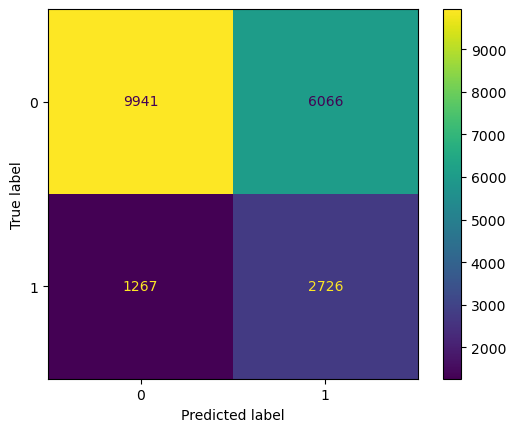

In [150]:
cm = confusion_matrix(target_data,test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [151]:
confusion_matrix(target_data,test_pred)

array([[9941, 6066],
       [1267, 2726]], dtype=int64)

## decision tree

In [152]:
model_tree=DecisionTreeClassifier()

In [153]:
pipe_model_DT=Pipeline(steps=[
    ("fp",final_pipeline),
    ("md",model_tree)
])

In [154]:
pipe_model_DT.fit(X_train,y_train)

Pipeline(steps=[('fp',
                 Pipeline(steps=[('final',
                                  ColumnTransformer(transformers=[('pi',
                                                                   Pipeline(steps=[('term',
                                                                                    Pipeline(steps=[('term,cl',
                                                                                                     TermAndCreditLineTransformer())])),
                                                                                   ('num_actv',
                                                                                    Pipeline(steps=[('num_bc',
                                                                                                     num_actv_bc_tl())])),
                                                                                   ('mort_bal',
                                                                                    Pipeline(steps=[('tot_cur_bal,mort',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x00000179862D2C80>)])),
                                                                                   ('impute',...
                                                                    'fico_range_high',
                                                                    'earliest_cr_line']),
                                                                  ('oh',
                                                                   Pipeline(steps=[('ver',
                                                                                    Pipeline(steps=[('ver_status',
                                                                                                     <__main__.verification_status object at 0x0000017985EE4E20>)])),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse=False))]),
                                                                   ['home_ownership',
                                                                    'application_type',
                                                                    'initial_list_status',
                                                                    'purpose',
                                                                    'sub_grade',
                                                                    'verification_status'])]))])),
                ('md', DecisionTreeClassifier())])

In [155]:
test_predict_dt=pipe_model_DT.predict(data_test)

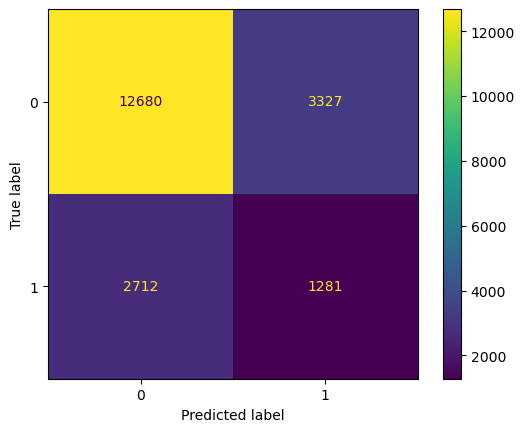

In [156]:
cm = confusion_matrix(target_data,test_predict_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Random Forest:

In [157]:
pipe_model_RF=Pipeline(steps=[
    ("fp",final_pipeline),
    ("md",RandomForestClassifier())
])

In [158]:
pipe_model_RF.fit(X_train,y_train)

Pipeline(steps=[('fp',
                 Pipeline(steps=[('final',
                                  ColumnTransformer(transformers=[('pi',
                                                                   Pipeline(steps=[('term',
                                                                                    Pipeline(steps=[('term,cl',
                                                                                                     TermAndCreditLineTransformer())])),
                                                                                   ('num_actv',
                                                                                    Pipeline(steps=[('num_bc',
                                                                                                     num_actv_bc_tl())])),
                                                                                   ('mort_bal',
                                                                                    Pipeline(steps=[('tot_cur_bal,mort',
                                                                                                     <__main__.tol_cur_bal_mort_acc object at 0x00000179862D2C80>)])),
                                                                                   ('impute',...
                                                                    'fico_range_high',
                                                                    'earliest_cr_line']),
                                                                  ('oh',
                                                                   Pipeline(steps=[('ver',
                                                                                    Pipeline(steps=[('ver_status',
                                                                                                     <__main__.verification_status object at 0x0000017985EE4E20>)])),
                                                                                   ('ohe',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse=False))]),
                                                                   ['home_ownership',
                                                                    'application_type',
                                                                    'initial_list_status',
                                                                    'purpose',
                                                                    'sub_grade',
                                                                    'verification_status'])]))])),
                ('md', RandomForestClassifier())])

In [161]:
test_predict_RF=pipe_model_RF.predict(data_test)

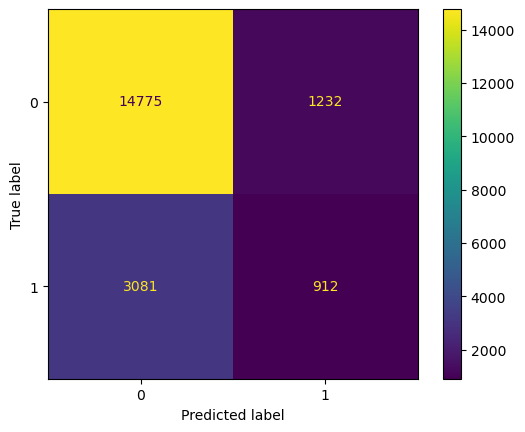

In [162]:
cm = confusion_matrix(target_data,test_predict_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [164]:
md=pipe_model_RF.named_steps['md']

In [166]:
feature_importance=md.feature_importances_

In [167]:
feature_importance

array([8.38606156e-02, 7.49112755e-02, 2.36802166e-02, 8.82630709e-02,
       1.51160602e-02, 9.12756752e-02, 3.28031913e-02, 5.25200457e-02,
       7.93188794e-02, 1.15418158e-01, 6.61624209e-02, 8.61145050e-02,
       8.28472131e-03, 4.00450791e-06, 5.81813182e-05, 6.61581047e-03,
       8.40846627e-03, 3.35149138e-03, 1.46318297e-02, 9.87997804e-03,
       1.25478208e-02, 6.84690030e-05, 5.99017494e-03, 1.05122523e-03,
       2.96031713e-03, 2.04416994e-03, 1.49098328e-03, 5.74027578e-03,
       2.19515607e-04, 2.29666646e-03, 1.31219822e-03, 2.94016917e-04,
       2.96696452e-03, 3.01271904e-03, 3.59597471e-03, 4.58940130e-03,
       3.72999948e-03, 3.68326208e-03, 4.05301136e-03, 4.43080181e-03,
       4.40986121e-03, 5.34802630e-03, 4.69355583e-03, 4.44745463e-03,
       4.47455506e-03, 4.52714013e-03, 4.09741444e-03, 3.80274539e-03,
       3.40848167e-03, 3.21939196e-03, 2.94429420e-03, 2.42865232e-03,
       2.20346445e-03, 1.98671807e-03, 1.89078729e-03, 1.72216578e-03,
      

## Random Forest Hyper parameter tuninig

In [ ]:
param_grid = {
    'mdl__n_estimators': [300,400,500],  
    'mdl__max_depth': [None, 10,15,25,], 
    'mdl__min_samples_split': [2, 5,10],  
    'mdl__min_samples_leaf': [1,2,4],  
    'mdl__criterion':['gini', 'entropy'],
    'mdl__max_features': ['sqrt', 'log2'],
}

In [ ]:
rf=RandomForestClassifier()

In [ ]:
pipe_model_rf=Pipeline(steps=[
    ("pre",final_pipeline),
    ("mdl",rf)
])

In [ ]:
#grid_search_new = GridSearchCV(estimator=pipe_model_rf, param_grid=param_grid,cv=KFold(n_splits=5), scoring='accuracy', n_jobs=-1,verbose=10,error_score='raise')


In [ ]:
#grid_search_new.fit(X_train,y_train)

## ADA Boost:

In [ ]:
model_ada=AdaBoostClassifier(estimator=RandomForestClassifier())

In [ ]:
pipe_model_ada=Pipeline(steps=[
    ("fs",final_pipeline),
    ("ms",model_ada)
])

In [ ]:
test_predict_dt=pipe_model_DT.predict(data_test)

In [ ]:
cm = confusion_matrix(target_data,test_predict_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()